# Tutorial of MMDetection (Version 3.3.0)

Please get in touch if interested in our future collaboration of science and/or business!\
Daiphys Technologies LLC - https://www.daiphys.com/

## 0. References

- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/
- https://mmdetection.readthedocs.io/en/latest/get_started.html
- https://mmdetection.readthedocs.io/en/latest/1_exist_data_model.html
- https://dev.classmethod.jp/articles/mmdetection-detect-samples/
- https://github.com/open-mmlab/mmcv/issues/3059
- https://github.com/open-mmlab/mmdetection/issues/10380

## 1. Preparation

### 1.1. Install

In [1]:
## Python
!python --version

Python 3.10.12


In [2]:
## PyTorch
!python -c 'import torch; print(torch.__version__)'

2.4.1+cu121


In [3]:
## Downgrading PyTorch on Google Colab (2.3.0+cu121) for MMCV Compatibility (2024/07/04)
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.4.1+cu121
    Uninstalling torchaudio-2.4.1+cu121:
      Successfully uninstalled torchaudio-2.4.1+cu121


In [4]:
## PyTorch
!python -c 'import torch; print(torch.__version__)'

2.1.0+cu121


In [5]:
## CUDA
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [6]:
!nvidia-smi

Wed Oct 23 07:55:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   40C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,068 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Ign:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 

In [8]:
## Resolving the dependency conflicts for openmim: ipython 7.9.0 requires jedi>=0.10
!pip install --upgrade jedi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00


In [9]:
!pip install --upgrade openmim
## Restarting the runtime after installing openmin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.4 MB/s eta 0:

In [1]:
!mim install mmengine

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 23.7 MB/s eta 0:00:00


In [2]:
#!mim install mmcv-full
#!mim install mmcv
!mim install 'mmcv==2.1.0'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 MB 24.6 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 38023, done.
remote: Total 38023 (delta 0), reused 0 (delta 0), pack-reused 38023 (from 1)
Receiving objects: 100% (38023/38023), 63.18 MiB | 15.01 MiB/s, done.
Resolving deltas: 100% (26233/26233), done.


In [4]:
!pip install -v -e mmdetection
#!pip install --upgrade mmdet

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmdetection
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-9h8tr3zm/mmdet.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-9h8tr3zm/mmdet.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-9h8tr3zm/mmdet.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for terminaltables from https://files.pythonhosted.org/packages/c4/fb/ea621e0a19733e01fe4005d46087d383693c0f4a8f824b47d8d4122c87e0/terminaltables-3.1.10-py2.py3-none-any.whl.metadata
  Running setup.py develop for mmdet
    Running command python setup.py develop
    running develop
    /usr/local/lib/python3.10/dist-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
      warnings.warn(
    /usr/loc

In [5]:
!python -c 'import mmdet; print(mmdet.__version__)'

3.3.0


### 1.2. Import

In [ ]:
#!pip list
#!pip freeze > requirements.txt

In [6]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pickle
import re
import csv
import math
import time
import datetime

In [ ]:
#from google.colab.patches import cv2_imshow

In [7]:
import base64
import IPython

In [8]:
from PIL import Image

In [9]:
import torch
import torchvision

In [10]:
sys.path.append('mmdetection')

In [11]:
import mmdet

In [12]:
from mmdet.apis import init_detector
from mmdet.apis import inference_detector
#from mmdet.apis import show_result_pyplot

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [13]:
from mmdet.utils import register_all_modules

In [14]:
register_all_modules()

In [15]:
from mmengine.visualization import Visualizer
from mmdet.registry import VISUALIZERS

In [16]:
import mmcv

In [ ]:
#from mmcv.transforms import Compose

In [17]:
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]

### 1.3. Setup

In [18]:
project = 'tutorial'

In [19]:
config_dir = project + '/configs'
output_dir = project + '/outputs'
checkpoint_dir = project + '/checkpoints'

In [20]:
if torch.cuda.is_available() :
    #device = 'cuda'
    device = 'cuda:0'
else :
    device = 'cpu'

In [21]:
device

'cuda:0'

In [22]:
img = 'mmdetection/demo/demo.jpg'
video = 'mmdetection/demo/demo.mp4'

## 2. Sample Data with Faster R-CNN

### 2.1. Image

In [23]:
## https://github.com/open-mmlab/mmdetection/tree/main/configs/faster_rcnn
#!mim download mmdet --config faster_rcnn_r50_fpn_1x_coco --dest $config_dir
!mim download mmdet --config faster-rcnn_r50_fpn_1x_coco --dest $config_dir

processing faster-rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 MiB 44.5 MB/s eta 0:00:00
Successfully downloaded faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth to /content/tutorial/configs
Successfully dumped faster-rcnn_r50_fpn_1x_coco.py to /content/tutorial/configs


In [24]:
#config_file = config_dir + '/faster_rcnn_r50_fpn_1x_coco.py'
config_file = config_dir + '/faster-rcnn_r50_fpn_1x_coco.py'
checkpoint_file = config_dir + '/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [25]:
model = init_detector(config_file, checkpoint_file, device=device)

Loads checkpoint by local backend from path: tutorial/configs/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [ ]:
#model.dataset_meta

In [26]:
%%time
result = inference_detector(model, img)

CPU times: user 975 ms, sys: 171 ms, total: 1.15 s
Wall time: 1.11 s


In [27]:
result.pred_instances.scores
#result.pred_instances.labels
#result.pred_instances.bboxes

tensor([0.9888, 0.9872, 0.9832, 0.9778, 0.9713, 0.9678, 0.9594, 0.9592, 0.9568,
        0.9510, 0.9459, 0.9440, 0.9332, 0.8664, 0.8268, 0.7778, 0.7532, 0.7163,
        0.6011, 0.5920, 0.5540, 0.5434, 0.4765, 0.4609, 0.4171, 0.4008, 0.3436,
        0.2881, 0.2611, 0.2582, 0.2560, 0.2560, 0.2106, 0.2039, 0.1974, 0.1500,
        0.1484, 0.1477, 0.1418, 0.1354, 0.1327, 0.1258, 0.1153, 0.1108, 0.1012,
        0.0978, 0.0969, 0.0889, 0.0814, 0.0764, 0.0744, 0.0733, 0.0719, 0.0647,
        0.0632, 0.0516, 0.0516], device='cuda:0')

In [ ]:
## model.show_result was removed after MMDetection version 2 (2024/07/04)
#model.show_result(img, result)
#model.show_result(img, result, out_file=output_dir + '/faster-rcnn_r50_fpn_1x_coco_result.jpg')

In [ ]:
## show_result_pyplot was removed after MMDetection version 2 (2024/07/04)
#show_result_pyplot(model, img, result, score_thr=0.50)

In [28]:
#image = mmcv.imread(img)
image = mmcv.imread(img, channel_order='rgb')
#image = mmcv.imconvert(image, 'bgr', 'rgb')

In [29]:
## Visualization Option A for MMDetection version 3
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta
visualizer.add_datasample('result', image, data_sample=result, draw_gt=False, show=True, wait_time=0, pred_score_thr=0.70, out_file=output_dir + '/faster-rcnn_r50_fpn_1x_coco_result_01.jpg')

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


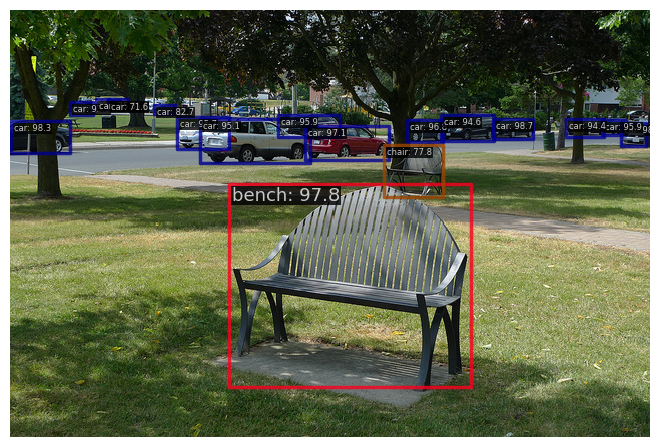

In [30]:
visualizer.show()
#visualizer.get_image()

In [31]:
## Visualization Option B for MMDetection version 3
pred_score_thr = 0.70
scores = result.pred_instances.scores[torch.where(result.pred_instances.scores>=pred_score_thr)]
labels = result.pred_instances.labels[torch.where(result.pred_instances.scores>=pred_score_thr)]
bboxes = result.pred_instances.bboxes[torch.where(result.pred_instances.scores>=pred_score_thr)]
labels_classes = list(map(lambda x: model.dataset_meta['classes'][x], labels.tolist()))
labels_palette = list(map(lambda x: model.dataset_meta['palette'][x], labels.tolist()))
labels_print = list(map(lambda x, y: f'{x}: {(y * 100.0):.1f}', labels_classes, scores.tolist()))
bboxes_origins = list(map(lambda x: [x[0], x[1]], bboxes.tolist()))
visualizer = Visualizer(image=image)
visualizer.draw_bboxes(bboxes, edge_colors=labels_palette, line_widths=3)
visualizer.draw_texts(labels_print, torch.tensor(bboxes_origins), font_sizes=8, colors='white', bboxes=dict(facecolor='red', edgecolor='black', linewidth=0, alpha=0.8))

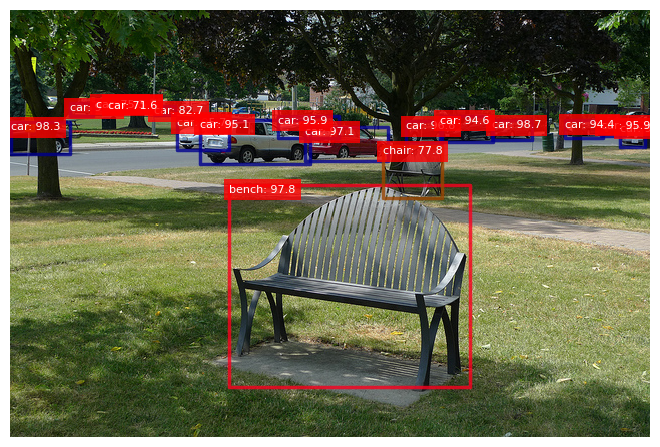

In [32]:
visualizer.show()
#visualizer.get_image()

In [33]:
cv2.imwrite(output_dir + '/faster-rcnn_r50_fpn_1x_coco_result_02.jpg', cv2.cvtColor(visualizer.get_image(), cv2.COLOR_RGB2BGR))

True

### 2.2. Video

In [ ]:
#model.cfg.test_dataloader.dataset.pipeline[0].type = 'LoadImageFromNDArray'
#test_pipeline = Compose(model.cfg.test_dataloader.dataset.pipeline)

In [34]:
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


In [35]:
video_reader = mmcv.VideoReader(video)

In [36]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

In [37]:
video_writer = cv2.VideoWriter(output_dir + '/faster_rcnn_r50_fpn_1x_coco_result.mp4', fourcc, video_reader.fps, (video_reader.width, video_reader.height))

In [38]:
for frame in video_reader :
    #frame = cv2.rotate(frame, cv2.ROTATE_180)
    result = inference_detector(model, frame)
    #frame = model.show_result(frame, result, score_thr=0.90)
    visualizer.add_datasample('video', frame, data_sample=result, draw_gt=False, show=False, wait_time=0, pred_score_thr=0.90)
    frame = visualizer.get_image()
    video_writer.write(frame)

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


In [39]:
video_writer.release()

In [40]:
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [41]:
mp4_data = open(output_dir + '/faster_rcnn_r50_fpn_1x_coco_result.mp4', 'rb').read()

In [42]:
mp4_url = 'data:video/mp4;base64,' + base64.b64encode(mp4_data).decode()
mp4_html = '<video width=400 controls><source src="{mp4_url}" type="video/mp4"></video>'

In [43]:
IPython.display.HTML(mp4_html)